In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,roc_curve,accuracy_score,auc,roc_auc_score,confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.decomposition import PCA, FastICA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


import sys
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(['CustomerID'],axis=1,inplace=True) # We dont need Customer ID

In [6]:
df.columns=['Gender','Age','Annual_Income','Spending_Score'] #change the names of the columns

In [7]:
# Convert gender to 1 and 0
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


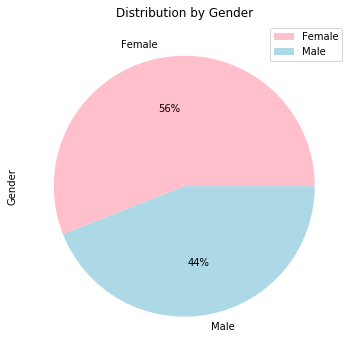

In [8]:
list_gen=df['Gender'].value_counts()
list_gen.plot.pie(figsize=(6, 6), legend=True,autopct='%1.0f%%',labels=['Female','Male'],colors=['pink','lightblue'])
plt.title('Distribution by Gender')
plt.show()

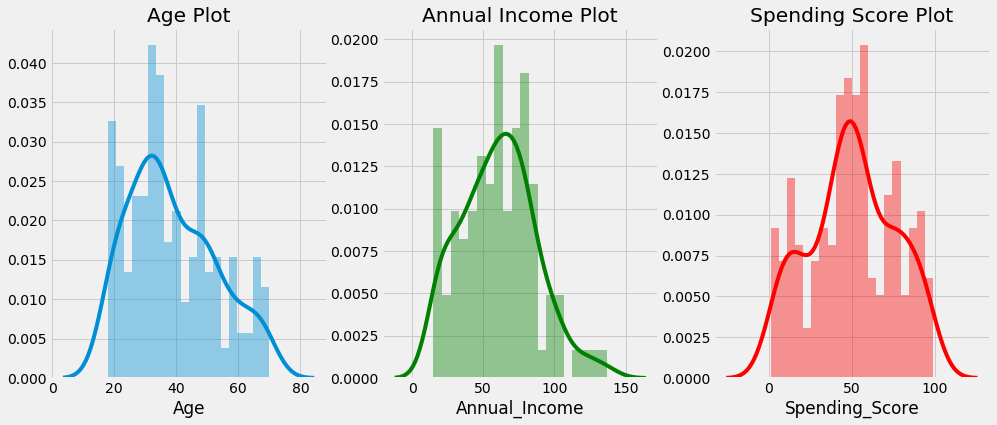

In [9]:
plt.style.use('fivethirtyeight')
AgePlot = df['Age'].value_counts()
IncomePlot = df['Annual_Income'].value_counts().sort_values()
ScorePlot = df['Spending_Score'].value_counts().sort_values()
fig, axs = plt.subplots(1,3,figsize=(15, 6))
sns.distplot(df['Age'] , bins = 20, ax=axs[0])
axs[0].title.set_text('Age Plot')
sns.distplot(df['Annual_Income'] , bins = 20,color='g',ax=axs[1])
axs[1].title.set_text('Annual Income Plot')
sns.distplot(df['Spending_Score'] , bins = 20,color='r',ax=axs[2])
axs[2].title.set_text('Spending Score Plot')

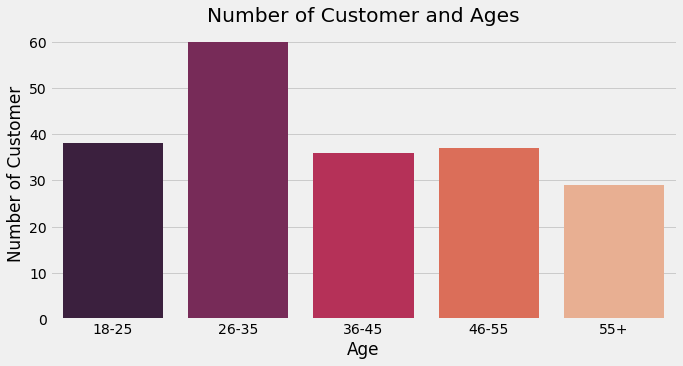

In [10]:
age18_25 = df[(df['Age'] <= 25) & (df['Age']>= 18)]['Age'].count()
age26_35 = df[(df['Age'] <= 35) & (df['Age']>= 26)]['Age'].count()
age36_45 = df[(df['Age'] <= 45) & (df['Age']>= 36)]['Age'].count()
age46_55 = df[(df['Age'] <= 55) & (df['Age']>= 46)]['Age'].count()
age55above =df[df['Age']>= 56]['Age'].count()
x = '18-25 26-35 36-45 46-55 55+'.split()
y = (age18_25, age26_35, age36_45 ,age46_55 ,age55above)
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

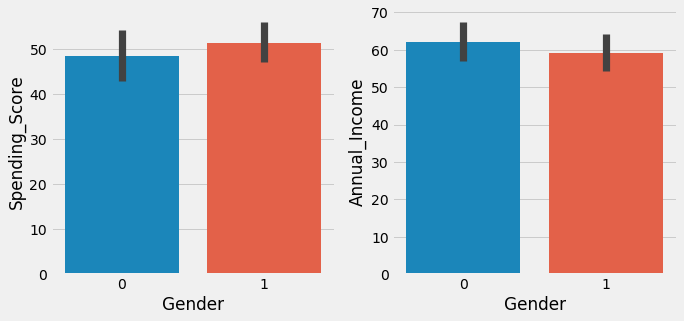

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(y='Spending_Score',x='Gender', data=df);
ax2 = fig.add_subplot(2,2,2)
sns.barplot(y='Annual_Income',x='Gender', data=df)
plt.show()

We can conclude from the graph above that female's annual income is lower, but their spending score is higher

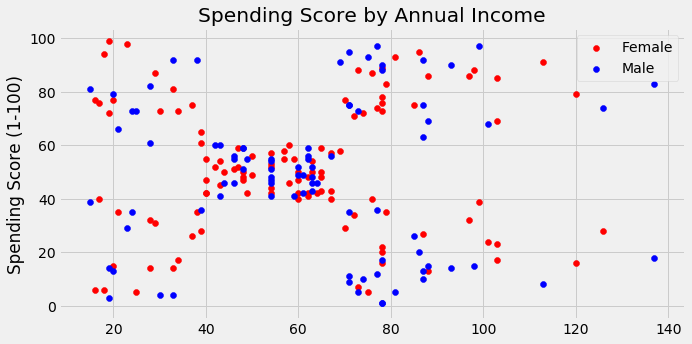

In [12]:
df0=df[df['Gender']==0]
df1=df[df['Gender']==1]
fig = plt.figure(figsize=(10,5))
plt.scatter(df1['Annual_Income'], df1['Spending_Score'],color='red',label='Female')
plt.scatter(df0['Annual_Income'], df0['Spending_Score'],color='blue',label='Male')

plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Annual Income')
plt.legend()
plt.show()

We can see that people who earns around 50k, has a similar spending score,
and that the gender doesn't seem to have a huge impact.




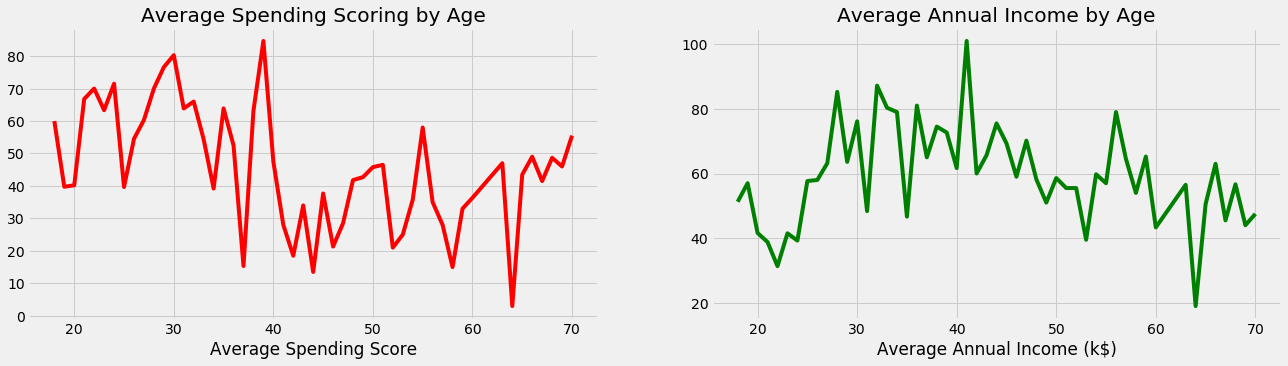

In [13]:
age_count_scr=pd.DataFrame(df.groupby('Age')['Spending_Score'].mean())
fig,axes=plt.subplots(1,2,figsize=(20,5))
axes[0].plot(age_count_scr.index,age_count_scr['Spending_Score'],color='red')
axes[0].set_xlabel("Average Spending Score")
axes[0].set_title('Average Spending Scoring by Age')
age_count_sal=pd.DataFrame(df.groupby('Age')['Annual_Income'].mean())
axes[1].plot(age_count_sal.index,age_count_sal['Annual_Income'],color='green')
axes[1].set_xlabel("Average Annual Income (k$)")
axes[1].set_title('Average Annual Income by Age')
plt.show()

We can coclude from the graph above that in around age 40 people spend the more but also earn the most.

Around ages 20-25 people tend to earn less but spend more.

Around 60-70 people don't earn so much but also don't spend so much.

# Creating Lable

In [14]:
MeanSS=df['Spending_Score'].mean()
df['Target'] = np.where(df['Spending_Score']>MeanSS, 1, 0)
df.head()


,Gender,Age,Annual_Income,Spending_Score,Target
0,0,19,15,39,0
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0


Adding labels to data where the Spending score is greater/Less than Spending Score mean value

1: Target- people who spend above the average (Our target costumers)

0: Non-Target - people who do not spend so much

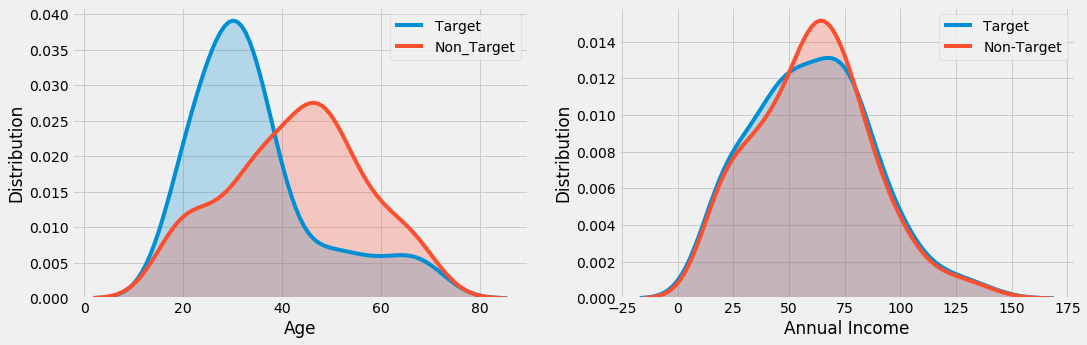

In [15]:
chart=df.drop(["Spending_Score"],axis=1)

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(16,5))

sns.kdeplot(chart.Age[chart.Target==1], label='Target', shade=True, ax=ax1)
sns.kdeplot(chart.Age[chart.Target==0], label='Non_Target', shade=True, ax=ax1)
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Age')

sns.kdeplot(chart.Annual_Income[chart.Target==1], label='Target', shade=True, ax=ax2)
sns.kdeplot(chart.Annual_Income[chart.Target==0], label='Non-Target', shade=True, ax=ax2)
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Annual Income')
plt.show()

Age seems like a really good predictor and annual income has a slight inverse effect on target/non-target.


**The goal is to classify the mall's customers to Targets & Non-Targets costumers according to their features.** (classification problem)

# Features Selection

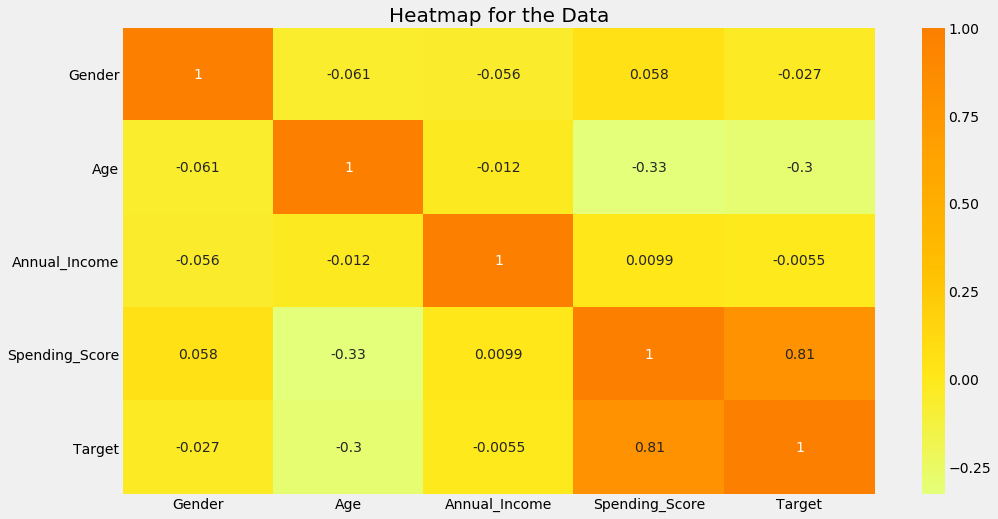

In [16]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

# Features Scaling & Train-Test Split

In [17]:
original_df=df
scaler = StandardScaler()
model_df=df.drop(['Target','Spending_Score'],axis=1)
scaled_df= scaler.fit_transform(model_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=('Gender','Age','Annual_Income')

In [18]:
X = scaled_df
y = df['Target']


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (134, 3)
Training Labels: (134,)
Testing FeatureSet: (66, 3)
Testing Labels: (66,)


# KNN model

**GridSearchCV: Parameters tuning**

In [20]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
print(grid.best_params_)

{'n_neighbors': 10, 'weights': 'uniform'}


We choose **k=10 , uniform**

In [21]:

knn = KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(y_pred)
print("Testing Score: ",knn.score(X_test,y_test))
print("Training Score: ",knn.score(X_train, y_train))

[0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0]
Testing Score:  0.6212121212121212
Training Score:  0.7388059701492538


In [22]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()


predicted    
                 0   1
actual 0        23  11
       1        14  18

In [23]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 18
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 14


In [24]:
print("Accuracy of KNN (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of KNN (cross-validation): ",cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

Accuracy of KNN (split):  0.6212121212121212
Accuracy of KNN (cross-validation):  0.724937343358396


We can see that cross-validation has better accuracy.

In [25]:
f1_score(y_test, y_pred,average='weighted')

0.6199002259958158

# Gaussian Naive Bayes model

In [26]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0]


In [27]:
print("Testing Score: ",gnb.score(X_test,y_test))
print("Training Score: ",gnb.score(X_train, y_train))

Testing Score:  0.7121212121212122
Training Score:  0.6940298507462687


In [28]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        23  11
       1         8  24

In [29]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 24
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 8


In [30]:
print("Accuracy of GaussianNB (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of GaussianNB (cross-validation): ",cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean())

Accuracy of GaussianNB (split):  0.7121212121212122
Accuracy of GaussianNB (cross-validation):  0.6793609022556392


We can see that when we split the data we have better accuracy.

In [31]:
f1_score(y_test, y_pred,average='weighted')

0.711922902967679

# Adaboost model

**GridSearchCV: Parameters tuning**

In [32]:
ada=AdaBoostClassifier()
parm_grid={'n_estimators':[50,100,150],'learning_rate':[0.001,0.01,0.1]}
grid=GridSearchCV(estimator=ada,param_grid=parm_grid,scoring='accuracy',cv=10)
grid.fit(X,y)
print(grid.best_params_)

{'learning_rate': 0.001, 'n_estimators': 50}


In [33]:
adab = AdaBoostClassifier(n_estimators=50,learning_rate= 0.001,random_state=42 )
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
print(y_pred)
print("Testing Score: ",adab.score(X_test,y_test))
print("Training Score: ",adab.score(X_train, y_train))

[1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0]
Testing Score:  0.7121212121212122
Training Score:  0.7014925373134329


In [34]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        23  11
       1         8  24

In [35]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 24
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 8


In [36]:
print("Accuracy of Adaboost (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Adaboost (cross-validation): ",cross_val_score(adab, X, y, cv=10, scoring='accuracy').mean())

Accuracy of Adaboost (split):  0.7121212121212122
Accuracy of Adaboost (cross-validation):  0.7054135338345865


We can see that when we split the data we have better accuracy.

In [37]:
f1_score(y_test, y_pred,average='weighted')

0.711922902967679

# Logisitc Regression

In [38]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print('(best parameters)' ,logreg_cv.best_params_)

(best parameters) {'C': 0.01, 'penalty': 'l2'}


In [39]:
logreg = LogisticRegression(C=0.01,penalty='l2')
logreg.fit(X, y)
y_pred=logreg.predict(X_test)
print(y_pred)
print("Testing Score: ",logreg.score(X_test,y_test))
print("Training Score: ",logreg.score(X_train, y_train))

[1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0]
Testing Score:  0.696969696969697
Training Score:  0.7014925373134329


In [40]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        23  11
       1         9  23

In [41]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 23
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 9


In [42]:
print("Accuracy of Logistic Regression (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Logistic Regression (cross-validation): ",cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

Accuracy of Logistic Regression (split):  0.696969696969697
Accuracy of Logistic Regression (cross-validation):  0.6948872180451129


We can see that there is no big difference between cv and splitting

In [43]:
f1_score(y_test, y_pred,average='weighted')

0.696969696969697

# Decision Tree Model

In [44]:
param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
print(grid.best_params_)

{'max_depth': 3, 'min_samples_split': 10}


In [45]:
dt = DecisionTreeClassifier(random_state=42,max_depth= 3,min_samples_split= 10)
dt.fit(X,y)
y_pred=dt.predict(X_test)
print(y_pred)
print("Testing Score: ",dt.score(X_test,y_test))
print("Training Score: ",dt.score(X_train, y_train))

[1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0]
Testing Score:  0.7424242424242424
Training Score:  0.7388059701492538


In [46]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        25   9
       1         8  24

In [47]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 24
True Negatives (TN): 25
False Positives (FP): 9
False Negarives (FN): 8


In [48]:
print("Accuracy of Decision Tree (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree (cross-validation): ",cross_val_score(dt, X, y, cv=10, scoring='accuracy').mean())

Accuracy of Decision Tree (split):  0.7424242424242424
Accuracy of Decision Tree (cross-validation):  0.7156766917293232


We can see that when we split the data we have better accuracy.

In [49]:
f1_score(y_test, y_pred,average='weighted')

0.7424833872595066

# PCA

In [126]:
pca = PCA(n_components=2)
pca.fit(original_df)
pc12 = pca.transform(original_df)
df_pca = pd.DataFrame(
    pc12,
    columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,-31.713086,-33.153185
1,1.046658,-56.840660
2,-57.345754,-13.404824
3,-1.902449,-53.491113
4,-32.029780,-30.542080


Text(0, 0.5, 'Second Principal Component - PC2')

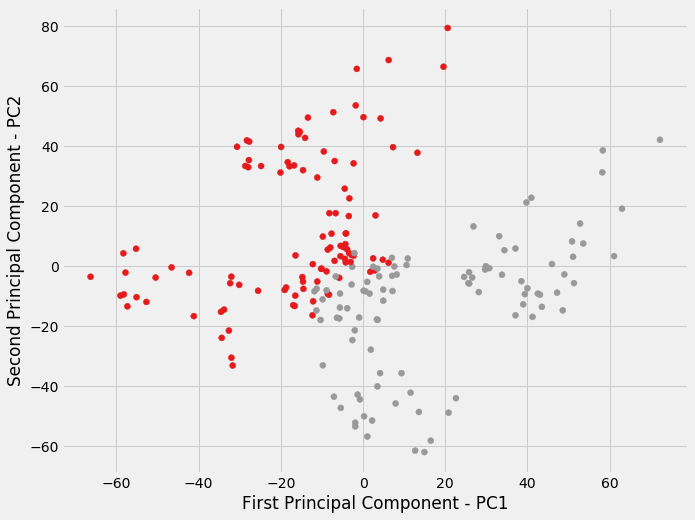

In [128]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    c=original_df['Target'],
    cmap='Set1')
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')

In [97]:
models = ["k-Nearest Neighbors","Gaussian Naive Bayes","AdaBoost","Logistic Regression","Decision Tree"]
algorithms = [knn, gnb, adab, logreg, dt]
estimotors = {  "k-Nearest Neighbors" : knn,
                "Gaussian Naive Bayes" : gnb,
               "AdaBoost" : adab,
               "Logistic Regression" : logreg,
                 "Decision Tree" : dt  
              }

In [115]:
all_components = pd.DataFrame(index=models)
for n in np.arange(1,4,1):
    score=[]
    sys.stdout.write(str(n)+', ')
    pca = PCA(n_components=n,random_state=42)
    pca_train = pca.fit_transform(X_train)  
    pca_test = pca.transform(X_test)
    for model in algorithms:
        model.fit(pca_train,y_train)
        pred_test = model.predict(pca_test)
        score.append(metrics.accuracy_score(pred_test, y_test))
    score = pd.DataFrame(score, index=models)   
    score.columns=[n]
    all_components = pd.concat([all_components,score],axis=1, join='inner')
all_components

1, 2, 3, 

,1,2,3
k-Nearest Neighbors,0.590909,0.606061,0.621212
Gaussian Naive Bayes,0.515152,0.590909,0.696970
AdaBoost,0.530303,0.530303,0.545455
Logistic Regression,0.515152,0.560606,0.696970
Decision Tree,0.545455,0.484848,0.606061


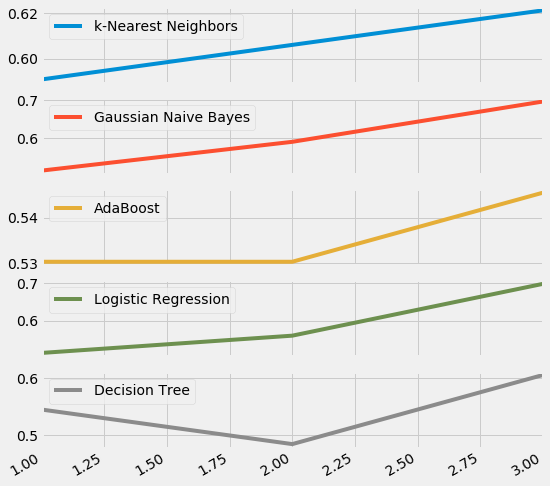

In [108]:
 all_components.transpose().plot(subplots=True, figsize=(8, 9))
plt.show()

We can conclude that in all the models 3 components have the best accuracy

# ICA

In [53]:
all_components1 = pd.DataFrame(index=models)
for n in np.arange(1,4,1):
    score=[]
    sys.stdout.write(str(n)+', ')
    ica = FastICA(n_components=n,random_state=42)
    ica_train = ica.fit_transform(X_train)  
    ica_test = ica.transform(X_test)
    for model in algorithms:
        model.fit(ica_train,y_train)
        pred_test = model.predict(ica_test)
        score.append(metrics.accuracy_score(pred_test, y_test))
    score = pd.DataFrame(score, index=models)   
    score.columns=[n]
    all_components1 = pd.concat([all_components1,score],axis=1, join='inner')
all_components1

1, 2, 3, 

,1,2,3
k-Nearest Neighbors,0.590909,0.590909,0.606061
Gaussian Naive Bayes,0.515152,0.590909,0.666667
AdaBoost,0.530303,0.590909,0.545455
Logistic Regression,0.515152,0.515152,0.515152
Decision Tree,0.545455,0.424242,0.606061


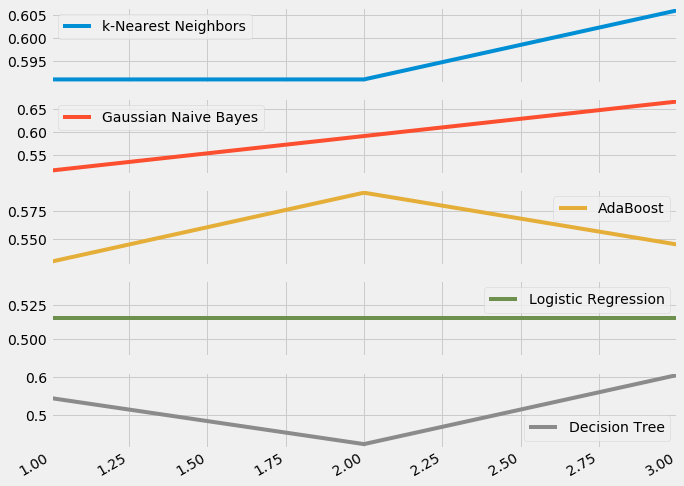

In [54]:
_= all_components1.transpose().plot(subplots=True, figsize=(10, 9))

In [130]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.696969696969697
train score: 0.7089552238805971


In [131]:
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.5151515151515151
train score: 0.4925373134328358


# Zero Model

In [65]:
dc = DummyClassifier(strategy="uniform")
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

In [66]:
print("Accuracy of Dummy Classifier (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Dummy Classifier (cross-validation): ",cross_val_score(dc, X, y, cv=10, scoring='accuracy').mean())

Accuracy of Dummy Classifier (split):  0.5909090909090909
Accuracy of Dummy Classifier (cross-validation):  0.4694360902255639


Our models are doing much better than zero model!